In [1]:
# 파일 읽는법
import pandas as pd
# 구분자 탭일때
pd.read_csv('filename.txt', sep='\t', encoding='utf8')
pd.read_csv('filename.txt', sep=',', encoding='utf8')

# 칼럼 이름 정해줄때 names 로 지정
df = pd.read_csv('filename.txt', names=['a','b','c'])

# 파일 읽을때 특정값 NaN 취급하고 싶을떄 na_values 로 지정
pd.read_csv('filename.txt', na_values=['null', 'NA', '','n/a'])

# 파일 저장
df.to_csv('filename2.txt', sep='|', index=False)

# 날짜 생성하는법
pd.date_range(start='20200101', end='20201212')

# 데이터 프레임을 array 로 변환
import numpy as np
np.array(df)

# 이 배열은 2행 3행
[[1,2,3],[2,3,4]]

FileNotFoundError: [Errno 2] File b'filename.txt' does not exist: b'filename.txt'

In [7]:
import pandas as pd 
import numpy as np
# 새롭게 DataFrame 생성할때
pd.DataFrame(data=['a','b'], index=[0,1], columns=['c'])

# 특정 컬럼 데이터 셋 종류 중복없이 가져올 때
df = pd.DataFrame([[1,1,1],[2,2,2],[2,3,float('nan')]], columns=['a','b','c'])
list(set(df['a']))

# 원하는 컬럼에 특정 단어 추가하여 컬럼명 생성
new_cols = [i+'_mms' for i in list(df)] 
new_cols

# 원하는 부분만 컬럼명 변경
# 2번쨰 컬럼부터만 변경하고 싶을떄
df.columns = list(df.columns[:1]) + [i+'_mms' for i in list(df.columns)[1:]]

# 특정 인덱스명 변경
df.rename(index= {0:3}, inplace=True)
df

df = pd.DataFrame([[1,1,1],[2,2,2],[2,3,float('nan')]], columns=['a','b','c'])

# 특정값 컬럼에 여러값 비교 후 특정 값이 있는 행만 추출
df[df.a.isin([1, 'b'])]

# 특정값 nan 인지 판별
import math
math.isnan(10)
math.isnan(float('nan'))

# 특정 컬럼명 변경
df.rename(columns = {'c':'d'}, inplace=True)
df.rename({'d':'c'}, axis=1)

# 특정 컬럼 삭제
df.drop(['a','b'], axis=1)
df.drop(columns=['a'])

# nan 아닌 열만 선택
df[~df.d.isna()]

# 결측치 개수 구하기
df.isna().sum()

# 원하는 조건의 컬럼만 선택
df[(df.a==1) & (df.b==1)]

# 한행씩 조건에 따라 처리
print(df.apply(lambda x: 'y' if x.d == 1 else 'n', axis=1))

# na 포함한 특정 행 제거할때
df.dropna(subset=['a','d'])

# na 가 하나라도 있는 행만 추출
df[df.isnull().any(axis=1)]

# na 값을 평균으로 대체하고 싶을 때
df.d.fillna(df.d.mean())

# 결측값을 변수별로 평균으로 대체하고 싶을때
df.fillna(df.mean())
# 또는
df.where(pd.notnull(df), df.mean(), axis='columns')
# pandas where 와 numpy의 where 함수는 다름
# 다 이때 string과 numeric 변수 혼용해 쓰면 안됨
# df.where(c, y) == np.where(c, 1, y)

# na 의 값을 같은 날짜의 평균값으로 대체하고 싶을때
df = pd.DataFrame([[1,'20180101'], [np.nan,'20180101']], columns = ['n', 'day'])
temp = df.groupby('day').apply(lambda x: x.n.mean())
df.n = df.apply(lambda x: temp[x.day] if math.isnan(x.n) else x.n, axis=1)

df = pd.DataFrame([[1,'20180101'], [np.nan, ' '], [3,'20180101']], columns = ['n', 'day'])

# 바로 앞방향의 값으로 결측치 채울때 , limit 으로 몇번째껄 볼껀지 조절
df.fillna(method='ffill', limit=1)
df.fillna(method='bfill', limit=1)

# 빈칸만 있는 특정 행 제거할때
df[~df.day.apply(lambda x: x.isspace())]

# 특정행만 조건에 따라 처리하고 싶을때
def func(x):
  if x==1:
    return 'a'
  return 'b'

df['n'].apply(lambda x: func(x))
# 또는
df.apply(lambda x: func(x.n), axis=1)

# 인덱스 재정렬할때
df.reset_index(inplace=True, drop=True)

# 특정 열만 가져올때 [이상: 미만] 
df.iloc[:, 1:]

# 특정 행만 가져올때 [이상: 미만]
df.iloc[1:]

# 이전 데이터와 연산(lead(뒤에있는것 가져오기)/lag(앞에있는것 가져오기))
df = pd.DataFrame([0,1,2,3], columns=['n'])
# 하나씩 밀기(lag)
df['pre'] = df['n'].shift(1)
# 하나씩 당기기(lead)
df['post'] = df['n'].shift(-1)
# or
df['cal'] = df.n - df.pre
df

# 오름차순 정렬 => 오름 : True / 내림 : False
df.sort_values(by=['cal', 'post'], ascending=[True, False])

# 자연 로그로 변경 (로그 밑 e)
import numpy as np
np.log(df['n'])

# 상용 로그로 변경 (로그 밑 10)
np.log10(df['n'])

# 지수 변환
np.exp(df.n)

# 특정 컬럼들의 합
np.sum(df[['pre','post']], axis=1)

# 가장 큰값 3개 찾기
df.n.nlargest(2).index

# np.array에서 오름차순한 결과 인덱스 나타내기
arr = np.array([1,2,5,4,6])
arr.argsort()

# np.array에서 내림차순한 결과 인덱스 나타내기
arr.argsort()[::-1]

# arr[a:b:c] 의미 => a~b까지 C 간격으로

# numpy.array type 처리
# 평균
np.mean(arr)

# 중앙값
np.median(arr)

# 최빈값
from scipy import stats
stats.mode(arr)

# 데이터 프레임 복사
df2 = df.copy()
df2

# string null 검사
pd.isnull(df.pre)

# nan 검사
np.isnan(df.pre)




0    y
1    n
2    n
dtype: object


{1, 2, 3, 5}

In [8]:
# 리스트나 array set 자료 교집합 구하기
arr1 = [1,2,3,4]
arr2 = [3,4,5,6]
# 교집합
set(arr1).intersection(set(arr2))
# 합집합
set(arr1).union(set(arr2))
# 차집합
set(arr1).difference(set(arr2))
# set 값 1개 추가
s1 = {1,2}
s1.add(3)
# set값 여러개 추가
s1.update([4,5])
# set 특정값 제거
s1.remove(4)
s1

{1, 2, 3, 5}

In [9]:
# 랜덤 샘플링 number (뽑아내는 숫자 기준), fraction(비율 기준)
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(1,200).T)
# 복원
df.sample(n=10000, random_state=1234, replace=True)
# 비복원
df.sample(frac=0.3, random_state=1234, replace=False)

,0
197,0.011846
157,0.722912
31,0.715383
48,0.790136
63,0.997957
59,0.146485
5,0.870042
7,0.040747
117,0.939169
108,0.878203


In [10]:
# string 여러개 비교
'sdfa' in ['a','b']
# 특정 글자 있는지 확인
x = 'sdfa'
[any(s in str(x) for s in ['a','b','f'])]

# 특정 글자 모두 있는지 확인
[all(s in str(x) for s in ['a','b','f'])]

# 자리수 버림
import math
x = 1.234
math.trunc(x*100)/100

# 내림
np.floor(x)
# 올림
np.ceil(x)

# 문자열에 abc 가 있는 행만 추출
df = pd.DataFrame([['abcd', 1], ['dddf', 2]], columns=['a','b'])
df.a.apply(lambda x : 'abc' in str(x))
df.a.str.contains('abc')
# 시작시점 찾기
df.a.str.find('abc')

# 값별 빈도 테스트
pd.DataFrame(df.a.value_counts())

# 데이터 프레임 유일한 값 찾기
df.a.unique()

# 타입변경
# int 로 변경
df.b.astype('uint8')

# string 로 변경
df.b.astype('str')

# category 로 변경
df.b.astype('category')

# list to array
np.array([1,2,3])

# array to list
arr = np.array([1,2,3])
arr.tolist()

# 행렬 원하는 형태로 만들기
arr = np.array([1,2,3])
arr.reshape((3,1))

# 행렬 곱
np.dot(arr.reshape((3,1)), arr.reshape((1,3)))

# pandas index 에 특정 값 제거
df = pd.DataFrame([['abcd', 1], ['dddf', 2]], columns=['a','b'])
df.drop(0)

# 선형 보간법
ts = pd.DataFrame([1, np.nan, np.nan, 10], columns=['a'])
ts
ts.a.interpolate()

0     1.0
1     4.0
2     7.0
3    10.0
Name: a, dtype: float64

In [11]:
# 유클리디안 거리
# (3,6) , (1,3)
np.sqrt(pow(3-1,2) + pow(6-3,2))

from scipy.spatial import distance
distance.euclidean([3,6], [1,3])  

# 맨해탄 거리
distance.cityblock([3,6], [1,3])


5

In [12]:
# 데이터 변경(transform)
# 문자열 띄워쓰기별 나눌때
'stee sf'.split()
# 문자열 , 로 나누기
'lskdjf, sldjkf'.split(',')

# 양쪽 공백 삭제
s = ' ㅁㄴ이ㅏ호 '
s.strip()

# 왼쪽 공백 삭제
s.lstrip()
# 오른쪽 공백 삭제
s.rstrip()

# 공백만 잇는 데이터 제거
df = pd.DataFrame(['ddd ', ''], columns=['a'])
df[df.a.apply(lambda x: False if x.strip() == '' else True)]

# 모든 문자열 바꾸기
# a => b 변경
'adfasdf'.replace('a', 'b')

# 데이터의 모든 공백을 np.nan으로 대체하기
import numpy as np
df.a.replace(r'^s+', '', regex=True).replace('', np.nan)

# 문자열 공백만 있는지 확인
' '.isspace()

# 한줄로 for 문 if문
[i if i!=0 else 'no' for i in [0,2,3,1]]

['no', 2, 3, 1]

In [13]:
# join
df1 = pd.DataFrame([1,2,3], columns=['a'])
df2 = pd.DataFrame([3,4,5], columns=['a'])
# left join
pd.merge(left=df1, right=df2, on='a', how='left')
# right join
pd.merge(left=df1, right=df2, on='a', how='right')
# inner join 교집합
pd.merge(left=df1, right=df2, on='a', how='inner')
# outer join 합집합
pd.merge(left=df1, right=df2, on='a', how='inner')

# 여집합
df = pd.merge(left=df1, right=df2, on='a', how='outer', indicator=True)
df[df['_merge'] == 'left_only']


,a,_merge
0,1,left_only
1,2,left_only


In [14]:
# 두개의 DataFrame 비교해 다른값찾기
import pandas as pd
df1 = pd.DataFrame([1,2,3], columns=['a'])
df2 = pd.DataFrame([3,4,5], columns=['a'])
for i, j in zip(df1.a, df2.a):
  if i!=j:
    print(i,j)

# na 또는 x, y 라는 문자가 포함된 것 찾기
df1[(df1.a.isin(['x', 'y']))| (df1.a.isna())] 

# 나눗셈할떄 소수점 뒷자리 표시하려면
# 단순히 / 를 하면 정수에서 끊김
# => float 로 감쌈
float(3) / float(2)

# 최대값을 가진 행ㅇ르 추출할떄
df1.loc[df1.a.argmax()]

1 3
2 4
3 5


C:\Users\carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


a    3
Name: 2, dtype: int64

In [15]:
# 공분산
import numpy as np
a = np.random.rand(10,10)
np.cov(a)

# 상관계수
# method: pearson, spearman, kendall
import pandas as pd
df = pd.DataFrame(a)

df.corr(method='pearson')

# 두 칼럼의 상관계수 
df[[0,1]].corr()

# 원하는 컬럼의 상관계수
temp = df[list(df.columns)[3:7]].corr()
temp.index[1]
# 구한 첫번째 행 corr
temp.values[1]


array([0.31169258, 1.        , 0.43453435, 0.4851182 ])

In [16]:
# 특정 칼럼 추출
import numpy as np
a = np.random.rand(10,10)
import pandas as pd
df = pd.DataFrame(a)

col_names= [0,1]
df[col_names]

# 특정 칼럼의 특정 행 값 구하기
df[df[0]>0.7].values[0]

# n 배수 뽑
df[df[1] % 2 ==0]

# 데이터 프레임 합치기 => 단 concat 할때 dataframe에 drop 과 같은 처리를 하였다면 reset_index를 해줄것
df = pd.concat([df,df], axis=1, sort=False)

# 두 배열 합치기
arr1 = np.random.rand(3,3)
arr2 = np.random.rand(3,3)
# 가로로
np.concatenate((arr1,arr2), axis=1)

# 세로로
np.concatenate((arr1,arr2), axis=0)

# 배열 펼치기
np.concatenate((arr1))

# 배열 index 로 제거
np.delete(arr1, 1)


# 리스트 
# list 평균 낼때
import numpy as np
list_a = [1,2]
np.mean(list_a)

# list 중앙값
np.median(list_a)

# 리스트 추가
list_a = list_a + list_a

# 리스트 한줄 추가
list_a.extend(list_a)
list_a

# 1개 추가
list_a.append('b')


# 2번째에 5추가
list_a.insert(1,5)
list_a

# 리스트 원소 삭제
del list_a[0]
list_a

# 첫번째로 발견한 숫자만 삭제됨
list_a.remove(2)
list_a

# 리스트 여러 열 삭제
for i in [2,'b']:
  list_a.remove(i)

list_a

# 리스트 합
sum(list_a)


12

In [17]:
# 히스토그램
import matplotlib.pyplot as plt
# bins 는 간격
df = pd.DataFrame(np.random.rand(1,200))
df
p = plt.hist(df)
# 도수
print(p[0])
# 구간
print(p[1])
# 도수분포표
temp = pd.DataFrame(p[0].reshape(-1,1), index=[str(p[1][i]) + ' ~ ' + str(p[1][i+1]) for i in range(len(p[1])-1)], columns=['cnt'])
temp

[20. 21. 17. 21. 15. 22. 26. 21. 19. 18.]
[0.0039208  0.1034476  0.20297441 0.30250121 0.40202802 0.50155482
 0.60108163 0.70060843 0.80013524 0.89966204 0.99918885]


,cnt
0.0039207983779037114 ~ 0.10344760353938598,20.0
0.10344760353938598 ~ 0.20297440870086825,21.0
0.20297440870086825 ~ 0.3025012138623505,17.0
0.3025012138623505 ~ 0.4020280190238328,21.0
0.4020280190238328 ~ 0.501554824185315,15.0
0.501554824185315 ~ 0.6010816293467973,22.0
0.6010816293467973 ~ 0.7006084345082796,26.0
0.7006084345082796 ~ 0.8001352396697619,21.0
0.8001352396697619 ~ 0.8996620448312441,19.0
0.8996620448312441 ~ 0.9991888499927264,18.0


In [18]:
# 정규식
import re
# 대소문자 구분없이 특정 단어 찾기
regex = re.compile('word', re.I)
len(regex.findall('lsdkf word slkg')) >=1


True

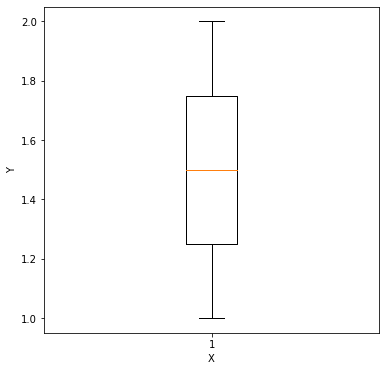

In [19]:
# box plot 그리기
# matplotlib 사용
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.boxplot([1,2])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
# pivot
# a를 행으로 b 값을 나열하는 d 컬럼 생성
import numpy as np
import pandas as pd
np.array([[1,2,3,4]]).T
# [1,2,3,4]
df = pd.DataFrame([[1,2,3,4]], columns=['a','b','c','d'])
print(df)
pd.pivot_table(df, index=['a'], columns=['d'], values=['b'])

# values 원하는 조건 처리
def func(x):
  if len(x) >=1:
    return 8
  else:
    return 9

temp = pd.pivot_table(df, index=['a'], columns=['d'], values=['b'], aggfunc=func, fill_value=0)
temp.columns = temp.columns.droplevel(0)
temp

   a  b  c  d
0  1  2  3  4


d,4
a,
1,8


In [21]:
# 사분위수 구하기
# q 로 해당 구간 선택
pd.Series([1,2,3,4,5]).quantile([0.25, 0.5, 0.75])
df = pd.DataFrame([1,2,3,4,5], columns=['a'])
df.a.quantile(q=0.25, interpolation='midpoint')

# IQR (Inter Quartile range)
df.a.quantile(q=0.75) - df.a.quantile(q=0.25)
from scipy import stats
stats.iqr(df.a)

2.0

In [22]:
# dict 구조 생성 후 자료 추가
dic = dict()
dic['a'] = 'b'

# dict 선언 후 배열 추가
dic = dict()
dic['a'] = ['a','b'] 

# key 값 뽑기
for k in dic.keys():
  print(k)

# value 값 뽑기
for v in dic.values():
  print(v)

# key, value 쌍으로 뽑기
for k, v in dic.items():
  print(k, v)

# key값으로 value 뽑기
dic.get('a')

# 해당 key 값이 있는지 조회
'a' in dic

# 딕셔너리 요소 삭제
del dic['a']


a
['a', 'b']
a ['a', 'b']


In [23]:
# 배열 추가 
arr = []
arr.append('b')
arr

arr[0].upper()

arr[0].lower()


'b'

In [24]:
# df.a 와 df['a'] 차이
# 기존 생성된 변수의 사칙연산과 같은 경우 df.a 는 연산 method 가 들어가 있다.
# .a 는 선언 후 사용
df = pd.DataFrame([[1,2]], columns=['a','b'])
df.c = ['a']
df['d'] = ['b']
df

C:\Users\carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,a,b,d
0,1,2,b


In [25]:
# 컬럼값이 특정 값에 해당하는 값이 2개 이상인 행만 추출
import numpy as np
df = pd.DataFrame([[i%2 for i in range(10)], [i % 3 for i in range(10)]])
print(df)
temp = np.where(df.iloc[:, :9] == 2, 'a','b')
ans = (temp == 'a').sum(axis=1) >=2
df[ans]


   0  1  2  3  4  5  6  7  8  9
0  0  1  0  1  0  1  0  1  0  1
1  0  1  2  0  1  2  0  1  2  0


,0,1,2,3,4,5,6,7,8,9
1,0,1,2,0,1,2,0,1,2,0
